# Generating data

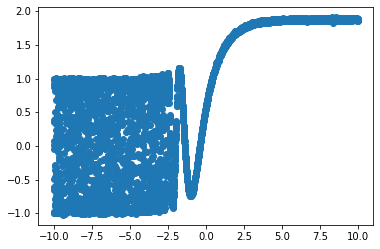

In [1]:
# python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def data_generator( n_samples ):
    x = np.random.uniform( -10 , 10 , n_samples )
    y = np.cos(0.5 + np.exp ( - x )) + 1/(1 + np.exp ( - x ))
    noise = np.random.normal (0 , 0.01 , n_samples )
    y += noise
    return x , y

complete_X , complete_Y = data_generator(5000)
train_X , train_Y = complete_X[:100] , complete_Y[:100]
large_X , large_Y = complete_X[100:] , complete_Y[100:]
loss_func = mean_squared_error
plt.scatter(complete_X, complete_Y)
plt.show()

The scatter plot above shows the complete set of data generated in this problem. 

# Empirical risk minimization

In [2]:
def erm(true_x, true_y, pol):
    N = np.size(pol)
    est_y = np.zeros_like(true_y)
    xp = np.linspace(-10, 10, 100)
    test = np.zeros_like(xp)

    for deg in range(N):
        est_y += pol[N-deg-1]*(true_x**deg)
        test += pol[N-deg-1]*(xp**deg)

    err = loss_func(true_y, est_y)
    plt.scatter(true_x, true_y)
    plt.plot(xp, test)
    plt.ylim(-1,2)
    return err

# Fitting polynomials (up to degree 30)

Text(0, 0.5, 'y')

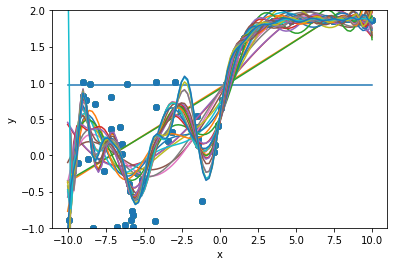

In [3]:
errs = np.zeros((31,1))
for deg in range(31):
    p = np.polyfit(train_X, train_Y, deg)
    errs[deg] = erm(train_X, train_Y, p)

plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 1.0, 'Empirical risk on training data')

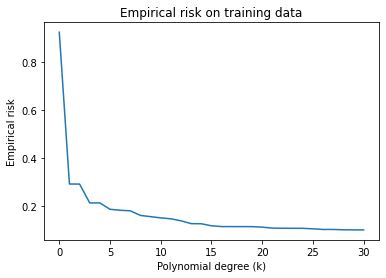

In [4]:
plt.plot(range(31), errs)
plt.xlabel("Polynomial degree (k)")
plt.ylabel("Empirical risk")
plt.title("Empirical risk on training data")

Here we see that the empirical risk when evaluated on the training data decreases as the polynomial grows. 

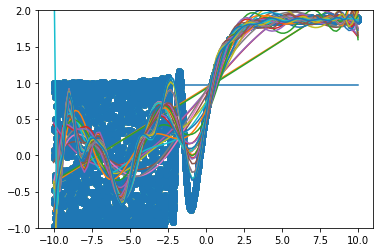

In [5]:
errs2 = np.zeros((31,1))
for deg in range(31):
    p = np.polyfit(train_X, train_Y, deg)
    errs[deg] = erm(large_X, large_Y, p)

Text(0.5, 1.0, 'Empirical risk on testing data')

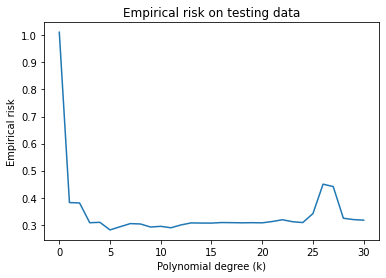

In [6]:
plt.plot(range(31), errs)
plt.xlabel("Polynomial degree (k)")
plt.ylabel("Empirical risk")
plt.title("Empirical risk on testing data")

We can see that the empirical risk when evaluated on testing data is lowest at k = 5.

# Estimating Bayes Risk Using Noise Free Data

In [7]:
def bayes_risk( n_samples ):
    x = np.random.uniform( -10 , 10 , n_samples )
    y1 = np.cos(0.5 + np.exp ( - x )) + 1/(1 + np.exp ( - x ))
    noise = np.random.normal (0 , 0.01 , n_samples )
    y2 = y1 + noise
    return x , y1, y2

complete_X, complete_Y1, complete_Y2 = bayes_risk(5000)
R = loss_func(complete_Y1, complete_Y2)
print('R* = {}'.format(R))

R* = 0.00010392152490787312


Here we see that R* is around 0.0001 which is the lowest error possible when h is unrestricted to any particular class of functions. This corresponds to the noise which is generated in the data.  

# Finding min R(h) where H is the class of polynomials

min(R(h)) = 0.22957727957811677


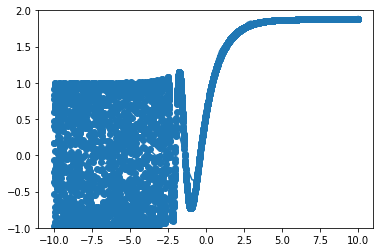

In [10]:
p4 = np.polyfit(complete_X, complete_Y1,30)
err3 = erm(complete_X, complete_Y1, p4)
print('min(R(h)) = {}'.format(err3))

This is the highest degree polynomial fitted to the data without noise. Here we see that when we restrict h to the class of polynomials, the lowest error we can achieve is 0.2295. Therefore the approximation error is min(R(h)) - R* = 0.2294. 

# ERM

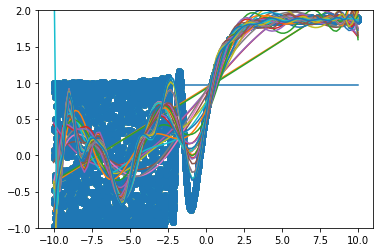

In [15]:
errs2 = np.zeros((31,1))
for deg in range(31):
    p = np.polyfit(train_X, train_Y, deg)
    errs[deg] = erm(large_X, large_Y, p)


Text(0.5, 1.0, 'Empirical risk on testing data')

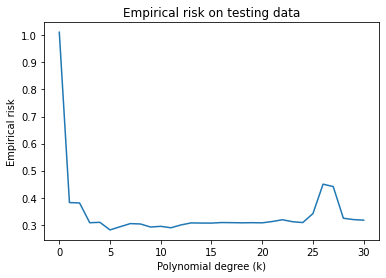

In [14]:

plt.plot(range(31), errs)
plt.xlabel("Polynomial degree (k)")
plt.ylabel("Empirical risk")
plt.title("Empirical risk on testing data")

The ERM is the same as before. 

# Estimation Error

Text(0.5, 1.0, 'Estimation error')

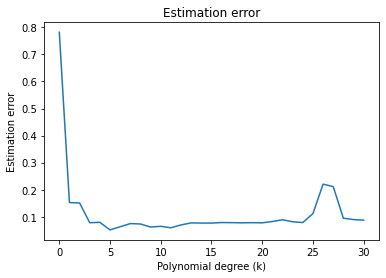

In [16]:
plt.plot(range(31), errs - err3)
plt.xlabel("Polynomial degree (k)")
plt.ylabel("Estimation error")
plt.title("Estimation error")

The estimation error behaves like the empirical risk since the first term of the estimation error is exactly the expectation of empirical risk. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=224c21b0-5aa5-401e-bf09-bc849471f0dc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>